<a href="https://colab.research.google.com/github/carolina-garay/M_Espacios_Verdes_2022_Grupo1/blob/Garay_Carolina_TP1/Analisis_y_Visualizacion_MEV_TP_Garay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoría: Monitoreo de Espacios Verdes -- Práctico de análisis y visualización

__DIPLODATOS 2022 - FAMAF UNC__

_GRUPO1_

Alumnos

- Artola, María Fernanda
- Garay, Carolina
- Nievas, Rafael
- Ormaechea, Sebastián


## Introducción
El empleo de imágenes satelitales se puede utilizar para determinar diversos índices de plantas tales como el área de clorofila de las hojas y los índices de contenido de agua. Esto es especialmente importante para la predicción del rendimiento efectivo y las aplicaciones relacionadas con la vegetación sobre la superficie terrestre. Particularmente podríamos establecer cuánta agua necesita una plaza, o parque, cada cierto tiempo por ejemplo. Es de particular interés determinar el crecimineto en altura del pasto de un parque y así un municipio podría establecer cuándo enviar su cuadrilla a cortarlo.

In [3]:
#Importación de librerías
import io
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import gdown

import seaborn as sns
sns.set_context('talk')


import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

##Carga del dataset

In [4]:
# from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
!gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: /content/espacios-verdes-indexs-cba-20170101-20220420.zip
100% 170M/170M [00:02<00:00, 77.0MB/s]


In [5]:
df=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)

##Primera visualización del conjunto de datos.

In [23]:
print(f"Dataframe HEAD")
display(df.head())


Dataframe HEAD


,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2,date
0,0.0871,0.1421,0.102570,0.09650,0.0,0.0550,47,0.0768,0.1516,0.098885,...,0.884216,0.0,0.453065,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,605976736,NaN,4650.710032,2017-01-03
1,0.0970,0.1936,0.118354,0.10660,0.0,0.0966,13,0.1006,0.1949,0.122154,...,0.971875,0.0,0.247045,13,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322368,NaN,1502.000513,2017-01-03
2,0.0992,0.1273,0.111805,0.11290,0.0,0.0281,19,0.1037,0.1369,0.117795,...,0.973017,0.0,0.207006,19,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322369,NaN,2004.192528,2017-01-03
3,0.0995,0.1933,0.118491,0.11355,0.0,0.0938,66,0.0993,0.1990,0.124512,...,0.966202,0.0,0.258424,66,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328111,NaN,6940.507640,2017-01-03
4,0.1059,0.1385,0.122453,0.12240,0.0,0.0326,47,0.1036,0.1580,0.132455,...,0.993986,0.0,0.260419,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328112,NaN,4587.356048,2017-01-03


In [9]:
print(f"Dataframe TAIL")
df.tail()

Dataframe TAIL


,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2,date
208927,0.0990,0.1684,0.115990,0.11270,0.0,0.0694,31,0.0862,0.1627,0.107387,...,0.892669,0.0,0.545993,31,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307532496,NaN,3824.467794,2022-04-17
208928,0.1145,0.3240,0.149746,0.13665,0.0,0.2095,80,0.0977,0.3363,0.149332,...,1.084102,0.0,2.805242,80,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307535460,Plaza Exodo Jujeño,7184.535857,2022-04-17
208929,0.0993,0.1388,0.110870,0.10625,0.0,0.0395,10,0.0930,0.1473,0.106160,...,0.914887,0.0,0.199024,10,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307796387,NaN,1147.997645,2022-04-17
208930,0.0991,0.1407,0.124008,0.12570,0.0,0.0416,53,0.0852,0.1377,0.118574,...,0.991200,0.0,0.299910,53,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307097955,NaN,5185.690046,2022-04-17
208931,0.0874,0.1347,0.104697,0.10180,0.0,0.0473,95,0.0707,0.1321,0.095941,...,0.889747,0.0,0.456241,95,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,901791744,NaN,9394.381202,2022-04-17


In [2]:
# Setup
!pip install pandas_profiling==2.8.0
!pip install pandas==1.2.0

     |████████████████████████████████| 259 kB 4.1 MB/s 
     |████████████████████████████████| 4.7 MB 25.5 MB/s 
     |████████████████████████████████| 59 kB 5.3 MB/s 
     |████████████████████████████████| 690 kB 70.7 MB/s 
     |████████████████████████████████| 812 kB 46.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=42523f3c940d659bb4020e5c0655605f7af0119088aefcc097b301eba38201ee
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=1fe271c802656ae5628e61ca837c0187dfcb5f651d4b2028883177bf02b19194
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [ ]:
profile = ProfileReport(df_)
profile

In [13]:
# Obtenemos los tipos de datos por cada columna
data_types = df.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
B02_min,float64
B02_max,float64
B02_mean,float64
B02_median,float64
B02_nodata,float64
...,...
clouds_on_raster,float64
osm_id,int64
name,object


##Variables de interés

Seleccionamos las siguientes variables:


- osm_id: Identificador asociado a la capa original (atlas-espacios-verdes).
- date: Fecha de la muestra.
- B03_median: Mediana correspondiente a la Banda 03 (color verde). 
- ndvi_max: Valor máximo correspondiente al indice NDVI.
- area_m2: Área en metros cuadrados

¿Qué _tipo de variable_ es cada una? Parecen estar acotadas? ¿Son fisicamente razonables?


In [24]:
df[["osm_id","B03_median","date","ndvi_max","area_m2"]].dtypes

osm_id          int64
B03_median    float64
date           object
ndvi_max      float64
area_m2       float64
dtype: object

## Análisis estádistico de las variables de interés

In [8]:
BANDS = ["B02", "B03", "B04", "B05", "B06", "B07", "B8A", "B08", "B11", "B12"]
TEST_COLS=[f"{B}_median" for B in BANDS]
df_bandas=df.loc[:,TEST_COLS]

***Outliers***: ¿Existen _outliers_ en las variables seleccionadas? (Note que en la presentación de los datos, esto parece estar presente en casi todos los casos) 

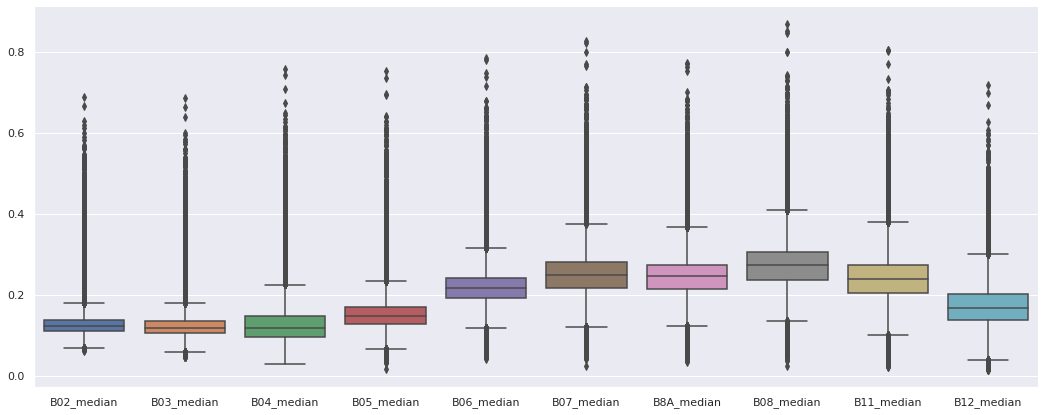

In [18]:
# Visualizamos los outliers
plt.figure(figsize=(18,7))
sns.set(font_scale = 1)
g = sns.boxplot(data=df_bandas)                  
sns.despine()

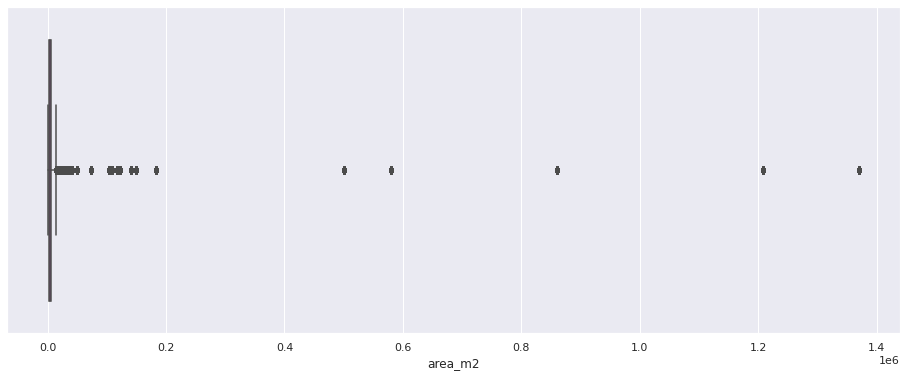

In [33]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df["area_m2"], color='magenta');


<Figure size 1440x576 with 0 Axes>

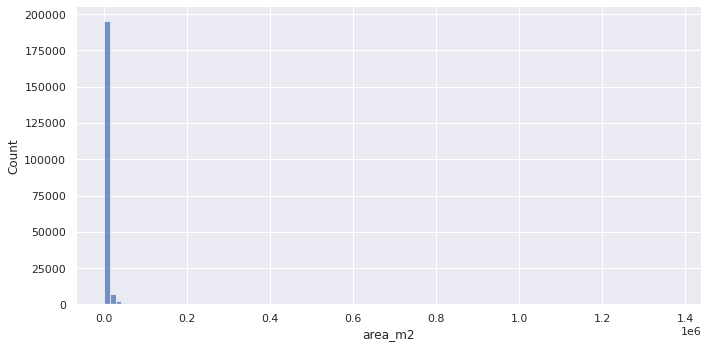

In [37]:
plt.figure(figsize=(20,8))
m=sns.displot(df["area_m2"], aspect=2, bins=100) 
sns.despine();

## Sobre el Trabajo Requerido

Se propone la elaboración de un _informe o reporte_ que deberá entregarse en formato html/pdf/md y deberá apuntar a un público técnico, 
pero sin conocimientos específicos en el tema (es decir nos deberiamos abstraer de conceptos tales como raster, vectores, etc).  

La estructura del reporte sugerida es:

- Introducción [1]
- Presentación del Dataset (el que consideren mas vistoso o demostrativo) [2]
- Variables de interés (relacionado al punto [3])
- Series temporales (relacionado al punto [4])
- Conclusiones ([5])

Cada parte del informe las deberian poder extraer de las respuestas o comentarios de los proximos puntos.

__NOTA__: Todos aquellos listados como __Punto Extra__ no son necesarios para el informe pero su resolución se considera un aporte positivo.

### Presentación/Slides (__Punto Extra__)

Se valorará la generacion de una presentación compacta (< 8 slides) en base a lo analizado, que permita responder:
- Utilidad del Monitoreo de espacios verdes
- Beneficios/Desventajas
- Limitaciones del enfoque via indices de imagenes satelitales y mitigaciones a esto
- Condiciones o criterios que hagan que un dado espacio sea monitoreable via imágenes satelitales

__NOTA__: Por presentacion, entendemos, google slides, ppt, beamer,las generadas a partir de las jupyter notebooks,etc.

## [1] Introducción 

Sobre porque consideran importante el monitoreo de espacios verdes (y otras razones que quieran sumar). Y que piensan descubrir a
partir del análisis y la visualizacion de los mismos (o que piensan que no vamos a poder hacer)

## [2] Presentación del Dataset

Sobre como entienden el dataset, como piensan que se generaron los valores dentro del dataset a partir de los datos crudos,etc.

## [3] Análisis Estadístico de Variables

Deberán realizar un análisis estadístico riguroso de variables que seleccionen por ser de su interés (entre 2 y 4), incluyendo en el set al menos una banda y un indice. 

Deberán responder preguntas como:

-   _Variables_: ¿Qué _tipo de variable_ es cada una? Parecen estar acotadas? (Puede ser interesante suplementar con alguna bibliografia extra respecto a que valores puede  tener un indice o banda) ¿Son fisicamente razonables?
-   _Outliers_: ¿Existen _outliers_ en las variables seleccionadas? (Note que en la presentación de los datos, esto parece estar presente en casi todos los casos)
-   _Valores Faltantes_: ¿Existen? ¿Es mejor descartarlos o completarlos con un valor particular? (Quizas le sirva responder la siguiente pregunta en primer lugar)
-   _Distribucion de Valores_: ¿Cómo es la _distribución_ de las variables en el dataset? ¿Se parecen a alguna distribucion que recuerde? Son todas de la misma distribución?
-   _Distribucion Condicionada_: ¿Cómo es la distribución de una variable (cualquiera que haya elegido) condicionada a la variable temporal por ejemplo? ¿Tiene sentido utilizar la dependencia temporal cuando estamos intentando completar valores faltantes?

En caso de calcular estadísticos, explicar por qué lo hicieron y que buscaban obtener al calcularlos. Utilizar los gráficos apropiados para mostrar el análisis realizado.  
Además:


-  ¿Existe _correlacion_ entre variables? ¿Entre cuales es mas "intensa"? -> Considere utilizar  [__pandas-profiling__](https://github.com/ydataai/pandas-profiling)
-  Analizar la dispersión de las bandas (para un estadistico, por ejemplo la media) a lo largo del tiempo. ¿La dispersión es la misma en todos los casos? ¿O existen bandas que "se dispersan" mas?

Utilizar gráficos que permitan visualizar de un modo simple las conclusiones.

## [4] Series temporales

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como **series de tiempo**. Elija alguno de los espacios verdes mas conocidos (Parque Sarmiento por ejemplo) y responda: 

- ¿Cual es el período de tiempo bajo análisis?
- Elija una banda y un indice (B02 y NDVI, por ejemplo) ambos parecen seguir alguna estacionalidad? Es decir, sus valores parecen "repetirse" cada cierto periodo? (Para este analisis considere utilizar la mediana de todas las mediciones {}_median).
- Ahora extienda el analisis a todas las variables, son estacionales? Todas tienen el mismo tipo de estacionalidad? __Nota__: En este punto y etapa no se espera un criterio estricto de estacionalidad sino mostrar que bajo algun criterio (por ejemplo boxplots "similares" por temporada, etc) parecen serlo.
- Seleccione un índice y grafique un boxplot para cada año. ¿Se mantiene inalterada en el tiempo la distribución? Que pasa si ese boxplot lo separa por estación (invierno,verano,otoño, primavera) y año son parecidas entre ellas en algun caso? Como se comportan año a año?
- Tiene sentido calcular outliers para todo el tiempo de la serie o deberia segmentarse? Es decir, un outlier en otoño es lo mismo que en primavera o verano?
- Sobre datos faltantes, existe algun intervalo temporal en el cual esto parezca ser mas recurrente (observe [ab-initio-data-build](../data/ab-initio-dataset-build.md) # Imagenes CBA) ? 

    __Punto Extra__: replique la imágen _cantidad de imágenes por fecha y nubosidad_, se le ocurre alguna forma alternativa de representarlo?
- Sobre los outliers, elija alguna banda o indice y compute los outliers (bajo algun criterio que le parezca razonable), ahora contraste los mismos (o el rango de los mismos) con la representacion de los rasters ( descargables desde: [parches rbg/cloud-mask](https://drive.google.com/file/d/1VJnFvc9waDWPzm0i6UitKwlOSaQVwn_j/view?usp=sharing) ), su eleccion de outliers parece sostenerse? O esta desechando datos que podrian servir?
- __Punto Extra__: Explique el indice NDVI, y su aplicabilidad para observar la evolución de cultivos. ¿Esto nos serviria para monitorear plazas y parques?
- __Punto Extra__: Se le ocurre alguna forma de normalizar los datos para hacernos independientes de los años (pero si mantener la estacionalidad)? 
- __Punto Extra__: El tipo de sensor que estamos considerando esta afectado fuertemente por las condiciones luminicas, puede encontrar algún par de {imagenes, indices} que parezcan representar esta situación? Para ello deberia seleccionar imagenes cercanas temporalmente (misma semana o mes, sin nubes) y obtener sus indices. Podria concluir algo a partir de eso? O le hacen falta mas datos? (Respuesta preliminar: la informacion brindada parece ser insuficiente) 
- ¿Dado un indice, es capaz de encontrar algun rango temporal en el cual parezca romperse la estacionalidad? (Esto lo podria intentar contrastar con las imagenes en rgb para ello le recomendamos que elija un espacio verde extenso)
- Le parece que existen espacios verdes que no sean susceptibles de ser monitoreados via las bandas o indices? 

    __Punto Extra__: Podria generar condiciones o criterios (tamaño, reflectancia en alguna banda, etc) que nos indiquen si un dado espacio es monitoreable ( o no) via imágenes satelitales?


## [5] Conclusiones

Se considerará como positivo la capacidad de generar conclusiones o analisis que permitan construir nuevo conocimiento en base a los datos provistos.
Respecto a las conclusiones, se espera que a partir de los puntos [3] y [4] hayan podido conocer el dataset y tener una idea (linea de acción) para mitigar o atacar temas tales como:
- Outliers?
- Faltantes de datos?
- Todas las variables son relevantes?
- etc

No hay límites respecto a la extensión, pero se valorará el poder de síntesis y de comunicación, así como el uso de las herramientas pertinentes..

## Pandas Profiling

In [ ]:
BANDS = ["B02", "B03", "B04", "B05", "B06", "B07", "B8A", "B08", "B11", "B12"]
TEST_COLS=[f"{B}_median" for B in BANDS]

In [ ]:
df_.loc[:,TEST_COLS]
df_test=df_.loc[:,TEST_COLS]
df_test.head()

KeyError: ignored

In [ ]:
profile = ProfileReport(df_test)

In [ ]:
profile.to_file('/content/pandas-profiling-test.html')

In [ ]:
profile.to_notebook_iframe()